# Checking Directory

In [1]:
import os
path="/Users/william/Documents/Documents/williamfinalproject/Machine Learning Project/MLP"
os.chdir(path)


In [2]:
os.getcwd()

'/Users/william/Documents/Documents/williamfinalproject/Machine Learning Project/MLP'

# Import Pandas, Numpy and others 

In [3]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
import mpl_toolkits

sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
#from sklearn.datasets import load_

from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
#SalePrice = pd.read_csv('sample_submission.csv', encoding='latin-1')
#SalePrices = pd.DataFrame(SalePrice)
#SalePrice.sort_values(by='Id', ascending=True, na_position='first')
#SalePrice['SalePrice'].dtype


/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


# Loading Train data set 

In [4]:
train = pd.read_csv('./train.csv', encoding = 'latin-1')
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
train_test = pd.read_csv("./test.csv")
train_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


# Explore data 

In [6]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# Real Estate - Features

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Categorical & numerical features

In [8]:
Columns = train.columns
# Numerical Columns 
num_columns = list(train._get_numeric_data().columns)

# All columns - numerical = Categorical
cat_columns = list(set(Columns)-set(num_columns))

# New DataFrame for Numerical and Categorical features
lists = [num_columns, cat_columns]
col_num_cat = pd.DataFrame(lists)
col_1 = col_num_cat.T
col_1.columns = ['Numerical', 'Categorical']
col_1

,Numerical,Categorical
0,Id,Functional
1,MSSubClass,BsmtFinType2
2,LotFrontage,BsmtFinType1
3,LotArea,KitchenQual
4,OverallQual,Exterior1st
5,OverallCond,BldgType
6,YearBuilt,Street
7,YearRemodAdd,SaleType
8,MasVnrArea,HouseStyle
9,BsmtFinSF1,Alley


# MISSING Values 

In [9]:
# Total Missing Null in ascending order
total_missing_null = train.isnull().sum().sort_values(ascending=False)

# Change to percentage 
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
Percentage = (percent *100)

# Concat the Total number and Percentage 
missing_data = pd.concat([total_missing_null, Percentage], axis=1, keys=['Total', 'Percentage'])

# Missing values above 2% could be significant, found 16 features
missing_data[missing_data.Percentage >= 2]



,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [10]:
top_missing_col = train[['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]
top_missing_col.head()



,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
0,NaN,NaN,NaN,NaN,NaN,65.0,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,Gd
1,NaN,NaN,NaN,NaN,TA,80.0,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,Gd
2,NaN,NaN,NaN,NaN,TA,68.0,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,Gd
3,NaN,NaN,NaN,NaN,Gd,60.0,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,TA
4,NaN,NaN,NaN,NaN,TA,84.0,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,Gd


# Clean Data - Munging/Wrangling 

##### Checking each missing values for each features
Question: What significant impact can have the missing values or few values? 

### Pool Quality Ex- Excellent, Fa - Fair, Gd -Good 

In [11]:
PoolQC_price =train.groupby(['PoolQC','MSZoning']).SalePrice.agg(['mean', 'count'])
PoolQC_price # import feature - modified the house price by reducing the pool


,,mean,count
PoolQC,MSZoning,,
Ex,RL,490000,2
Fa,RL,215500,2
Gd,RL,201990,3


In [12]:
#train.loc[train.PoolQC=='RL', :]
pools = train['PoolQC'] =='RL'


### MisFeatures

In [13]:
MiscFeature_price =train.groupby(['MiscFeature','MSZoning']).SalePrice.agg(['mean', 'count'])
MiscFeature_price # import feature - check the values ?? 



mean  count
MiscFeature MSZoning                      
Gar2        RL        170750.000000      2
Othr        RL        133000.000000      1
            RM         55000.000000      1
Shed        C (all)    68496.500000      2
            RL        158395.121951     41
            RM        129500.000000      6
TenC        RL        250000.000000      1

### Alley

In [14]:
Alley_price =train.groupby(['Alley','MSZoning']).SalePrice.agg(['mean', 'count'])
Alley_price # import feature - Pave cost > Grvl house 

# Grvl - Gravel
# Pave - Paved
# Na - No alley access


mean  count
Alley MSZoning                      
Grvl  RL        113760.714286     14
      RM        125508.444444     36
Pave  C (all)    71388.000000      2
      FV        175972.291667     24
      RH        179717.000000      2
      RL        176333.333333      6
      RM        157782.714286      7

### Fence

In [15]:
Fence_price =train.groupby(['Fence','MSZoning']).SalePrice.agg(['mean', 'count'])
Fence_price # import feature -

# GdPrv = Good Privacy
# MnPrv = Minimum Privacy
# GdWo = Good Wood 
# MnWw = Minimum Wood/Wire
# NA = No Fence

mean  count
Fence MSZoning                      
GdPrv RL        178665.098039     51
      RM        180600.000000      8
GdWo  C (all)    34900.000000      1
      FV        254900.000000      1
      RL        144939.622222     45
      RM        109771.428571      7
MnPrv C (all)    62500.000000      2
      RH        113450.000000      2
      RL        157218.951613    124
      RM        120926.586207     29
MnWw  RL        138027.777778      9
      RM        117450.000000      2

### FireplaceQu

In [16]:
FireplaceQu_price =train.groupby(['FireplaceQu','MSZoning']).SalePrice.agg(['mean', 'count'])
FireplaceQu_price # import feature -

# Ex	Excellent - Exceptional Masonry Fireplace
# Gd	Good - Masonry Fireplace in main level
# TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
# Fa	Fair - Prefabricated Fireplace in basement
# Po	Poor - Ben Franklin Stove
# NA	No Fireplace

mean  count
FireplaceQu MSZoning                      
Ex          FV        310000.000000      1
            RL        340913.636364     22
            RM        295000.000000      1
Fa          FV        176000.000000      1
            RL        168640.322581     31
            RM        117000.000000      1
Gd          C (all)   133900.000000      1
            FV        263015.937500     16
            RL        234674.620690    319
            RM        154776.795455     44
Po          RL        133952.200000     15
            RM        117200.000000      5
TA          FV        224011.142857      7
            RH        144000.000000      1
            RL        207372.531034    290
            RM        169422.666667     15

### LotFrontage

In [17]:
LotFrontage_price =train.groupby(['LotFrontage','MSZoning']).SalePrice.agg(['mean', 'count'])
LotFrontage_price 
# LotFrontage: Linear feet of street connected to property

mean  count
LotFrontage MSZoning                      
21.0        RM         94278.260870     23
24.0        FV        164716.666667      6
            RL        149000.000000      5
            RM        128250.000000      8
30.0        FV        154971.250000      4
            RL        270000.000000      1
            RM         73000.000000      1
32.0        RL        324000.000000      1
            RM        152375.000000      4
33.0        RM        113000.000000      1
34.0        FV        164833.333333      3
            RH        157000.000000      2
            RL        210750.000000      4
            RM         98000.000000      1
35.0        FV        180100.000000      4
            RL        127500.000000      1
            RM        140250.000000      4
36.0        RL        159000.000000      4
            RM        108250.000000      2
37.0        FV        197000.000000      1
            RL        131000.000000      2
            RM        146200.000000      2
38.0        RL        245500.000000      1
39.0        RL        236500.000000      1
40.0        FV        164500.000000      1
            RL        180783.000000      5
            RM        111483.333333      6
41.0        RL        225100.000000      5
            RM        127000.000000      1
42.0        RL        287500.000000      3
...                             ...    ...
111.0       RL        342643.000000      1
112.0       RL        145000.000000      1
114.0       RL        282450.000000      2
115.0       RL        152500.000000      2
116.0       RL        240000.000000      2
118.0       RL        415000.000000      2
120.0       C (all)    81000.000000      1
            RL        167455.000000      6
121.0       RL        260000.000000      1
            RM        168000.000000      1
122.0       RL        206500.000000      2
124.0       RL        218500.000000      2
128.0       RL        149500.000000      1
129.0       RL        258000.000000      2
130.0       RL        173250.000000      3
134.0       RL        234950.000000      2
137.0       RL        190000.000000      1
138.0       RL        200500.000000      1
140.0       RL        141000.000000      1
141.0       RL        215000.000000      1
144.0       RL        223500.000000      1
149.0       RL        174000.000000      1
150.0       RL        375000.000000      1
152.0       RL        164000.000000      1
153.0       RM         52500.000000      1
160.0       RL        745000.000000      1
168.0       RL        274725.000000      1
174.0       RL        319000.000000      2
182.0       RL        259000.000000      1
313.0       RL        201000.000000      2

[186 rows x 2 columns]

### GarageCond

In [18]:
GarageCond_price =train.groupby(['GarageCond','MSZoning']).SalePrice.agg(['mean', 'count'])
GarageCond_price
# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage

mean  count
GarageCond MSZoning                      
Ex         RL        127500.000000      1
           RM        120500.000000      1
Fa         C (all)    40000.000000      1
           RH         76000.000000      1
           RL        121354.833333     18
           RM        114166.933333     15
Gd         RL        185921.250000      8
           RM        132000.000000      1
Po         RL        108500.000000      3
           RM        108500.000000      4
TA         C (all)    83625.714286      7
           FV        214014.061538     65
           RH        132721.272727     11
           RL        196331.458450   1071
           RM        133193.401163    172

### GarageType

In [19]:
GarageType_price =train.groupby(['GarageType','MSZoning']).SalePrice.agg(['mean', 'count'])
GarageType_price

# 2Types	More than one type of garage
# Attchd	Attached to home
# Basment	Basement Garage
# BuiltIn	Built-In (Garage part of house - typically has room above garage)
# CarPort	Car Port
# Detchd	Detached from home
# NA	No Garage

mean  count
GarageType MSZoning                      
2Types     RH        145000.000000      1
           RL        168925.000000      4
           RM         87000.000000      1
Attchd     FV        234750.425000     40
           RH        153000.000000      3
           RL        205338.682581    775
           RM        144809.903846     52
Basment    C (all)    55993.000000      1
           RL        170790.000000     15
           RM        144333.333333      3
BuiltIn    FV        276637.333333      3
           RL        261348.654321     81
           RM        104750.000000      4
CarPort    C (all)   108000.000000      1
           RH         82000.000000      1
           RL        114943.166667      6
           RM        110000.000000      1
Detchd     C (all)    76897.833333      6
           FV        167772.045455     22
           RH        121419.142857      7
           RL        137099.181818    220
           RM        126736.015152    132

### GarageYrBlt

In [20]:
GarageYrBlt_price =train.groupby(['GarageYrBlt','MSZoning']).SalePrice.agg(['mean', 'count'])
GarageYrBlt_price

mean  count
GarageYrBlt MSZoning                      
1900.0      C (all)   133900.000000      1
1906.0      RM        135000.000000      1
1908.0      RL        240000.000000      1
1910.0      RM        125000.000000      3
1914.0      RL        138887.000000      1
            RM        163000.000000      1
1915.0      RM        131200.000000      2
1916.0      RL        128000.000000      2
            RM        126000.000000      3
1918.0      RL        237000.000000      2
1920.0      C (all)    40000.000000      1
            RL        116166.666667      6
            RM        114700.000000      7
1921.0      RL        159200.000000      2
            RM         89000.000000      1
1922.0      RL        172250.000000      2
            RM        109833.333333      3
1923.0      RL        194250.000000      2
            RM        125000.000000      1
1924.0      RL        116166.666667      3
1925.0      RL        147780.000000      5
            RM        144000.000000      5
1926.0      RL        165250.000000      2
            RM        122000.000000      4
1927.0      RM        115000.000000      1
1928.0      RL        104750.000000      2
            RM        155000.000000      2
1929.0      RL        177000.000000      1
            RM        120000.000000      1
1930.0      RH        103600.000000      1
...                             ...    ...
1998.0      RM        159833.333333      3
1999.0      FV        189133.333333      9
            RL        212231.555556     18
            RM        146633.333333      3
2000.0      FV        180800.000000      5
            RL        209563.636364     22
2001.0      FV        226000.000000      1
            RL        243505.263158     19
2002.0      RL        217800.000000     25
            RM        120500.000000      1
2003.0      FV        240166.666667      3
            RL        237298.973684     38
            RM        164555.555556      9
2004.0      FV        212616.666667      6
            RL        231415.794118     34
            RM        159303.076923     13
2005.0      FV        192305.777778      9
            RL        228720.673077     52
            RM        134725.000000      4
2006.0      FV        213355.000000     10
            RL        272698.520833     48
            RM        235000.000000      1
2007.0      FV        215171.714286      7
            RL        244573.023810     42
2008.0      FV        274566.000000      5
            RL        309790.086957     23
            RM        392500.000000      1
2009.0      FV        233353.333333      9
            RL        360679.250000     12
2010.0      RL        337874.666667      3

[192 rows x 2 columns]

### GarageFinish

In [21]:
GarageFinish_price =train.groupby(['GarageFinish','MSZoning']).SalePrice.agg(['mean', 'count'])
GarageFinish_price
# Fin	Finished
# RFn	Rough Finished	
# Unf	Unfinished
# NA	No Garage

mean  count
GarageFinish MSZoning                      
Fin          FV        245674.750000     20
             RH        157000.000000      2
             RL        245879.843648    307
             RM        164606.086957     23
RFn          C (all)    84058.666667      3
             FV        214087.300000     30
             RL        204570.848000    375
             RM        134585.714286     14
Unf          C (all)    74640.800000      5
             FV        171653.333333     15
             RH        122193.400000     10
             RL        148440.498807    419
             RM        125885.442308    156

### GarageQual

In [22]:
GarageQual_price =train.groupby(['GarageQual','MSZoning']).SalePrice.agg(['mean', 'count'])
GarageQual_price

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage

mean  count
GarageQual MSZoning                      
Ex         RL        127500.000000      1
           RM        297750.000000      2
Fa         RH         76000.000000      1
           RL        131229.363636     22
           RM        118739.000000     25
Gd         RL        216050.000000     11
           RM        215166.666667      3
Po         RL         96500.000000      1
           RM        102000.000000      2
TA         C (all)    78172.500000      8
           FV        214014.061538     65
           RH        132721.272727     11
           RL        195973.877111   1066
           RM        129781.329193    161

### BsmtExposure -Refers to walkout or garden level walls

In [23]:
BsmtExposure_price =train.groupby(['BsmtExposure','MSZoning']).SalePrice.agg(['mean', 'count'])
BsmtExposure_price

# Gd	Good Exposure
# Av	Average Exposure (split levels or foyers typically score average or above)	
# Mn	Mimimum Exposure
# No	No Exposure
# NA	No Basement

mean  count
BsmtExposure MSZoning                      
Av           C (all)    45652.000000      2
             FV        253867.777778      9
             RH        131500.000000      2
             RL        214857.497382    191
             RM        117135.294118     17
Gd           RL        265263.393443    122
             RM        180691.666667     12
Mn           C (all)   118338.000000      2
             FV        254922.333333      6
             RH        160000.000000      1
             RL        195990.336957     92
             RM        155438.461538     13
No           C (all)    69550.000000      6
             FV        201931.400000     50
             RH        128161.166667     12
             RL        175038.660589    713
             RM        122164.354651    172

### BsmtFinType2 -Rating of basement finished area (if multiple types)

In [24]:
BsmtFinType2_price =train.groupby(['BsmtFinType2','MSZoning']).SalePrice.agg(['mean', 'count'])
BsmtFinType2_price

# GLQ	Good Living Quarters
# ALQ	Average Living Quarters
# BLQ	Below Average Living Quarters	
# Rec	Average Rec Room
# LwQ	Low Quality
# Unf	Unfinshed
# NA	No Basement

mean  count
BsmtFinType2 MSZoning                      
ALQ          RL        218347.058824     17
             RM        138500.000000      2
BLQ          RL        154397.838710     31
             RM        100000.000000      2
GLQ          RL        220638.888889      9
             RM        109600.000000      5
LwQ          RH        133000.000000      1
             RL        167529.069767     43
             RM        112000.000000      2
Rec          RL        168960.500000     50
             RM        114375.000000      4
Unf          C (all)    74528.000000     10
             FV        214014.061538     65
             RH        130566.714286     14
             RL        196287.535124    968
             RM        128070.698492    199

### BsmtFinType1 - Type 1 finished square feet

In [25]:
BsmtFinType1_price =train.groupby(['BsmtFinType1','MSZoning']).SalePrice.agg(['mean', 'count'])
BsmtFinType1_price


mean  count
BsmtFinType1 MSZoning                      
ALQ          FV        167200.000000      2
             RL        166748.453608    194
             RM        119269.791667     24
BLQ          C (all)    35311.000000      1
             FV        199500.000000      2
             RH        127125.000000      4
             RL        155542.338710    124
             RM        111470.588235     17
GLQ          FV        224218.393939     33
             RH        157000.000000      2
             RL        243925.079545    352
             RM        155745.161290     31
LwQ          RH        200000.000000      1
             RL        159788.679245     53
             RM        128415.000000     20
Rec          C (all)    92266.666667      3
             FV        207500.000000      1
             RH        122608.500000      4
             RL        151837.863636    110
             RM        123958.066667     15
Unf          C (all)    72194.833333      6
             FV        206326.185185     27
             RH        112000.000000      4
             RL        187961.709790    286
             RM        123171.242991    107

### BsmtCond - Evaluates the general condition of the basement

In [26]:
BsmtCond_price =train.groupby(['BsmtCond','MSZoning']).SalePrice.agg(['mean', 'count'])
BsmtCond_price

# Ex	Excellent
# Gd	Good
# TA	Typical - slight dampness allowed
# Fa	Fair - dampness or some cracking or settling
# Po	Poor - Severe cracking, settling, or wetness
# NA	No Basement


mean  count
BsmtCond MSZoning                      
Fa       C (all)   109450.000000      2
         RH        119333.333333      3
         RL        127272.916667     24
         RM        115623.687500     16
Gd       FV        206562.500000      4
         RL        217349.894737     57
         RM        167200.000000      4
Po       RL         61000.000000      1
         RM         67000.000000      1
TA       C (all)    65797.500000      8
         FV        214502.688525     61
         RH        133577.833333     12
         RL        193752.746384   1037
         RM        127496.321244    193

### BsmtQual -Evaluates the height of the basement

In [27]:
BsmtQual_price =train.groupby(['BsmtQual','MSZoning']).SalePrice.agg(['mean', 'count'])
BsmtQual_price

# Ex	Excellent (100+ inches)	
# Gd	Good (90-99 inches)
# TA	Typical (80-89 inches)
# Fa	Fair (70-79 inches)
# Po	Poor (<70 inches
# NA	No Basement

mean  count
BsmtQual MSZoning                      
Ex       FV        285126.000000      8
         RL        336251.943925    107
         RM        218666.666667      6
Fa       RH         76000.000000      1
         RL        118363.888889     18
         RM        115166.937500     16
Gd       FV        204033.438596     57
         RH        153000.000000      3
         RL        208492.463938    513
         RM        138132.000000     45
TA       C (all)    74528.000000     10
         RH        129630.363636     11
         RL        148357.484407    481
         RM        121237.809524    147

## Scale NA to numeric 

In [28]:
from sklearn.preprocessing import LabelEncoder
train.fillna('NA', inplace =True)

def scaleColumns(df, cols_to_scale):
    yy=LabelEncoder()
    for col in cols_to_scale:
        df[col] = pd.DataFrame(yy.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [29]:
scaleColumns(train,['SaleCondition','PoolQC','GarageCond','GarageQual','KitchenQual','FireplaceQu','HeatingQC','BsmtExposure','BsmtCond','BsmtQual','ExterCond','ExterQual'])


/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expec

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,3,NA,NA,0,2,2008,WD,4,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,3,NA,NA,0,5,2007,WD,4,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,3,NA,NA,0,9,2008,WD,4,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,3,NA,NA,0,2,2006,WD,0,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,3,NA,NA,0,12,2008,WD,4,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,3,MnPrv,Shed,700,10,2009,WD,4,143000
6,7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,...,0,3,NA,NA,0,8,2007,WD,4,307000
7,8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,...,0,3,NA,Shed,350,11,2009,WD,4,200000
8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,...,0,3,NA,NA,0,4,2008,WD,0,129900
9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,...,0,3,NA,NA,0,1,2008,WD,4,118000


In [30]:
train = train.replace('NA', 0)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,3,0,0,0,2,2008,WD,4,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,3,0,0,0,5,2007,WD,4,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,3,0,0,0,9,2008,WD,4,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,3,0,0,0,2,2006,WD,0,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,3,0,0,0,12,2008,WD,4,250000
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,0,3,MnPrv,Shed,700,10,2009,WD,4,143000
6,7,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,...,0,3,0,0,0,8,2007,WD,4,307000
7,8,60,RL,0.0,10382,Pave,0,IR1,Lvl,AllPub,...,0,3,0,Shed,350,11,2009,WD,4,200000
8,9,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,...,0,3,0,0,0,4,2008,WD,0,129900
9,10,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,...,0,3,0,0,0,1,2008,WD,4,118000


# Count unique Value in MS Zoning

In [31]:
pd.value_counts(train['MSZoning'].values, sort=False)

FV           65
RH           16
RM          218
C (all)      10
RL         1151
dtype: int64

In [32]:
# Mean Sale price per zone
x=train.groupby('MSZoning').SalePrice.agg(['mean', 'count'])
x
# FV has the highest  - Floating Village Residential
# RL the second       - Residential Low density
# RH the third        - Residential high Density
# RM the fourth       - Residential medium Density
# C  the lowest       - Commercial

,mean,count
MSZoning,,
C (all),74528.000000,10
FV,214014.061538,65
RH,131558.375000,16
RL,191004.994787,1151
RM,126316.830275,218


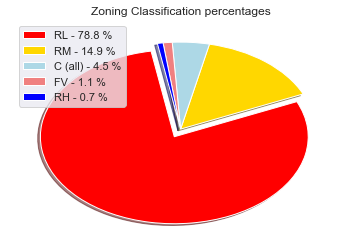

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


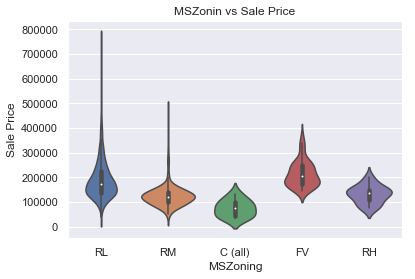

In [33]:
# Define zoning area by labeling 
labels = train["MSZoning"].unique()
sizes = train["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['red', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=100)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification percentages")
plt.show()

#graph by Sale 

sns.violinplot(train.MSZoning,train["SalePrice"])
plt.title("MSZonin vs Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

# Correlation - Features with SalePrices

In [34]:
# Assort correlationship features with Sale Prices 
corr=train.corr()["SalePrice"]
percent_corr = corr[np.argsort(corr, axis=0)[::-1]]*100
percent_corr

SalePrice        100.000000
OverallQual       79.098160
GrLivArea         70.862448
GarageCars        64.040920
GarageArea        62.343144
TotalBsmtSF       61.358055
1stFlrSF          60.585218
FullBath          56.066376
TotRmsAbvGrd      53.372316
YearBuilt         52.289733
YearRemodAdd      50.710097
MasVnrArea        47.261450
Fireplaces        46.692884
BsmtFinSF1        38.641981
WoodDeckSF        32.441344
2ndFlrSF          31.933380
OpenPorchSF       31.585623
HalfBath          28.410768
LotArea           26.384335
GarageYrBlt       26.136644
GarageCond        24.670527
BsmtFullBath      22.712223
BsmtUnfSF         21.447911
SaleCondition     21.309203
LotFrontage       20.962394
GarageQual        20.596283
BedroomAbvGr      16.821315
ExterCond         11.730266
ScreenPorch       11.144657
PoolArea           9.240355
BsmtCond           9.150303
MoSold             4.643225
3SsnPorch          4.458367
BsmtFinSF2        -1.137812
BsmtHalfBath      -1.684415
MiscVal           -2

# Graph Correlation features with Sale Price

In [35]:
correlations=train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,Attribute Pair,Correlation
11,"(PoolArea, PoolQC)",-0.884250
29,"(GarageArea, GarageCars)",0.882475
6,"(GrLivArea, TotRmsAbvGrd)",0.825489
32,"(1stFlrSF, TotalBsmtSF)",0.819530
12,"(2ndFlrSF, GrLivArea)",0.687501
28,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
19,"(BsmtFinSF1, BsmtFullBath)",0.649212
4,"(ExterQual, KitchenQual)",0.641584
26,"(ExterQual, OverallQual)",-0.634319
20,"(FullBath, GrLivArea)",0.630012


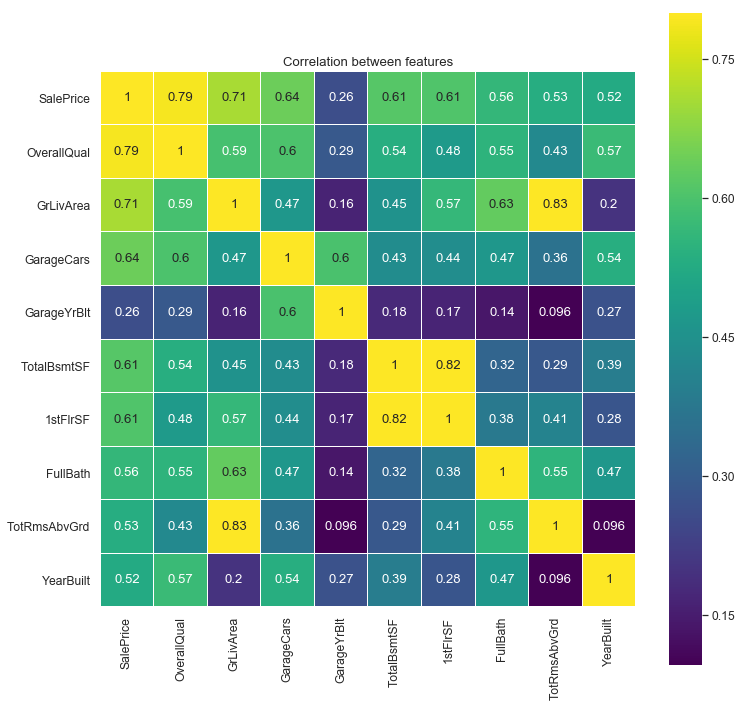

In [36]:
corrMatrix=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt"]].corr() #"YearRemoveAdd"
#remove "GarageArea"

sns.set(font_scale=1.10)
plt.figure(figsize=(12, 12))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

### Removing some of the features 

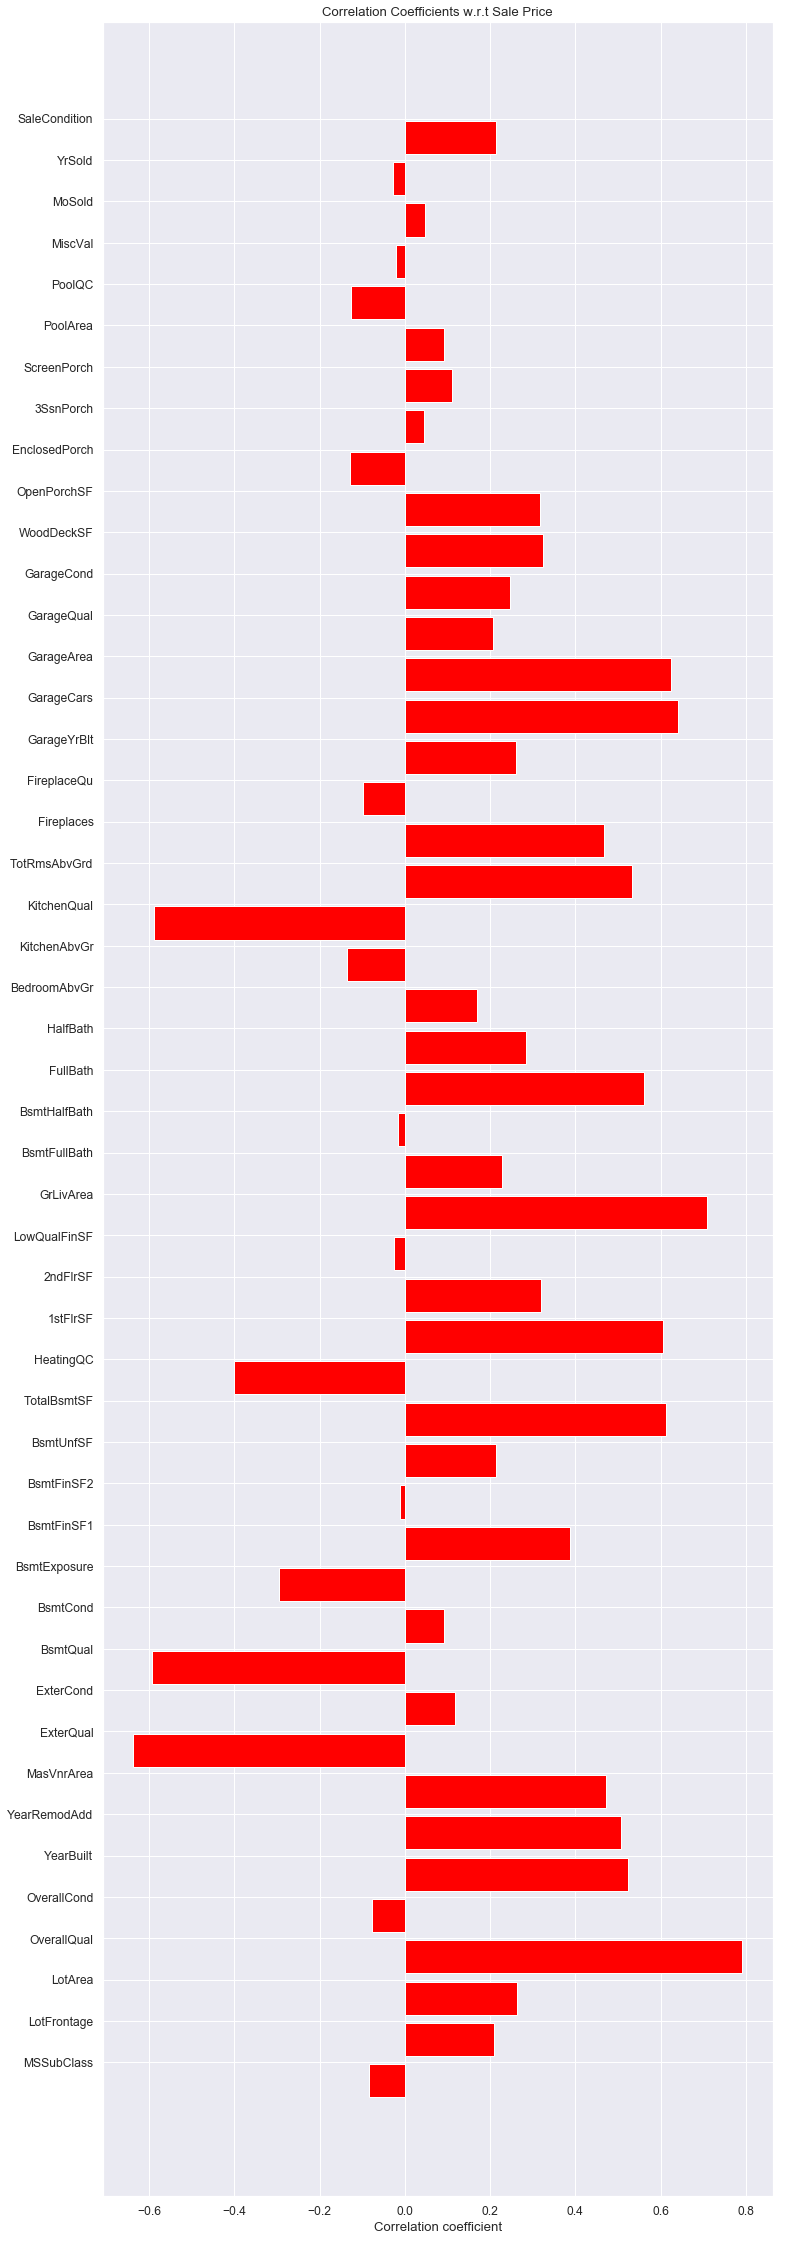

In [37]:
num_feat_2=train.columns[train.dtypes!=object]
num_feat_2=num_feat_2[1:-1] 
labels = []
values = []
for col in num_feat_2:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [38]:
correlations=train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,Attribute Pair,Correlation
11,"(PoolArea, PoolQC)",-0.884250
29,"(GarageArea, GarageCars)",0.882475
6,"(GrLivArea, TotRmsAbvGrd)",0.825489
32,"(1stFlrSF, TotalBsmtSF)",0.819530
12,"(2ndFlrSF, GrLivArea)",0.687501
28,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
19,"(BsmtFinSF1, BsmtFullBath)",0.649212
4,"(ExterQual, KitchenQual)",0.641584
26,"(ExterQual, OverallQual)",-0.634319
20,"(FullBath, GrLivArea)",0.630012


In [39]:
corr=train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
GarageCond       0.246705
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
SaleCondition    0.213092
LotFrontage      0.209624
GarageQual       0.205963
BedroomAbvGr     0.168213
ExterCond        0.117303
ScreenPorch      0.111447
PoolArea         0.092404
BsmtCond         0.091503
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold      

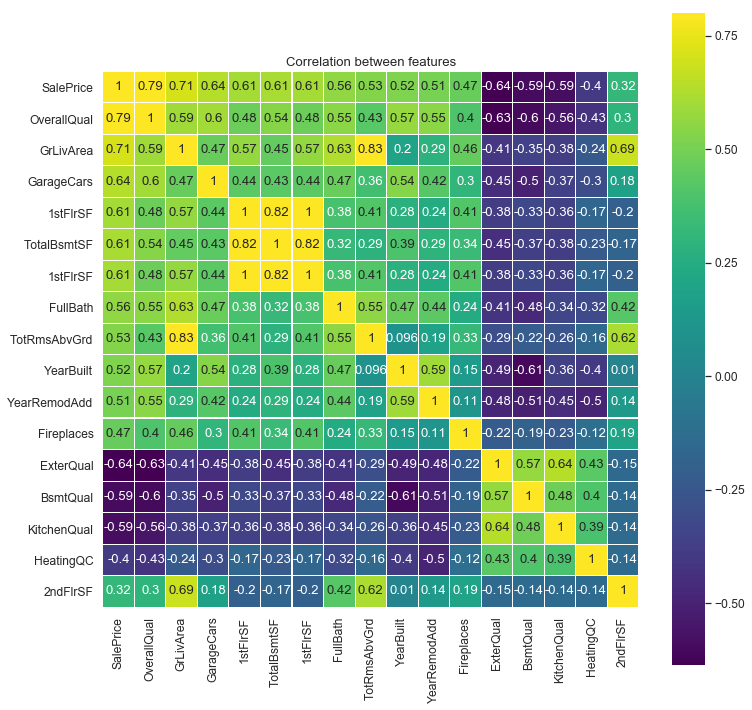

In [40]:
corrMatrix=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "1stFlrSF","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd","Fireplaces",
                 "ExterQual", "BsmtQual","KitchenQual","GarageFinish","HeatingQC","2ndFlrSF"]].corr() #"YearRemoveAdd"
#remove "GarageArea"

sns.set(font_scale=1.10)
plt.figure(figsize=(12, 12))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

### Running with Spearman method (double checking)

In [41]:
#train['SalePrice'].corr(train['LotArea'])
x = train.drop(['Id','LotShape','ExterQual','GrLivArea', 'YrSold','BsmtFinSF2','KitchenAbvGr','BsmtFinType1','BsmtUnfSF', 'ExterCond',
                'BsmtHalfBath','MiscVal','LowQualFinSF','3SsnPorch' ,'MoSold', 'LandSlope', 'SaleType', 'BsmtFinType2','OverallCond','MSSubClass',
                'BsmtCond','EnclosedPorch','BsmtCond','PoolArea','PoolQC','Fence','ScreenPorch','FireplaceQu','GarageArea','GarageCars'], 
               axis=1).corr(method='spearman').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)
x
#x.style.format(abs(x))


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
LotFrontage,1.0,0.34,0.19,0.13,0.13,0.14,-0.11,-0.075,0.037,0.26,-0.096,0.28,0.035,0.014,0.15,0.026,0.21,-0.14,0.26,0.076,0.12,0.053,0.069,0.03,0.11,0.13,0.24
LotArea,0.34,1.0,0.23,0.1,0.075,0.18,-0.13,-0.17,0.17,0.37,-0.069,0.44,0.12,0.096,0.24,0.14,0.34,-0.13,0.41,0.35,0.098,0.14,0.14,0.18,0.18,0.081,0.46
OverallQual,0.19,0.23,1.0,0.65,0.56,0.41,-0.58,-0.19,0.13,0.46,-0.46,0.41,0.29,0.098,0.58,0.3,0.12,-0.57,0.43,0.42,0.64,0.25,0.29,0.26,0.44,0.29,0.81
YearBuilt,0.13,0.1,0.65,1.0,0.68,0.4,-0.68,-0.28,0.19,0.43,-0.47,0.29,0.03,0.16,0.54,0.24,-0.035,-0.49,0.18,0.17,0.86,0.34,0.31,0.29,0.39,0.38,0.65
YearRemodAdd,0.13,0.075,0.56,0.68,1.0,0.23,-0.52,-0.2,0.063,0.3,-0.53,0.24,0.073,0.1,0.43,0.15,-0.054,-0.56,0.2,0.12,0.68,0.17,0.19,0.23,0.35,0.39,0.57
MasVnrArea,0.14,0.18,0.41,0.4,0.23,1.0,-0.26,-0.14,0.24,0.36,-0.17,0.35,0.062,0.12,0.29,0.17,0.11,-0.23,0.26,0.25,0.33,0.22,0.19,0.17,0.2,0.14,0.42
BsmtQual,-0.11,-0.13,-0.58,-0.68,-0.52,-0.26,1.0,0.28,-0.12,-0.32,0.41,-0.27,-0.13,-0.14,-0.51,-0.18,0.074,0.47,-0.22,-0.21,-0.63,-0.13,-0.13,-0.27,-0.34,-0.29,-0.57
BsmtExposure,-0.075,-0.17,-0.19,-0.28,-0.2,-0.14,0.28,1.0,-0.23,-0.22,0.11,-0.24,0.15,-0.25,-0.11,0.094,0.086,0.19,-0.02,-0.11,-0.23,-0.079,-0.051,-0.26,-0.063,-0.12,-0.25
BsmtFinSF1,0.037,0.17,0.13,0.19,0.063,0.24,-0.12,-0.23,1.0,0.41,-0.032,0.32,-0.19,0.67,0.012,-0.014,-0.084,-0.086,-0.05,0.19,0.11,0.19,0.17,0.18,0.081,-0.0016,0.3
TotalBsmtSF,0.26,0.37,0.46,0.43,0.3,0.36,-0.32,-0.22,0.41,1.0,-0.24,0.83,-0.29,0.3,0.33,-0.1,0.059,-0.33,0.23,0.33,0.37,0.2,0.22,0.23,0.27,0.18,0.6


### Norm/Std 

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.882876
Kurtosis: 6.536282


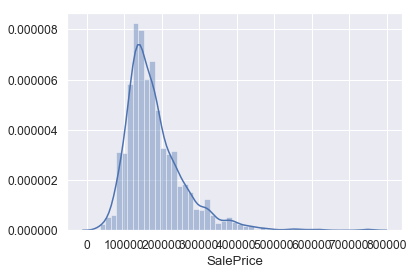

In [42]:
#train['GarageQual']
#train.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,})

sns.distplot(train['SalePrice']);
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())
#print("Standard Deviation %f" % np.std(train['SalePrice']))


/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


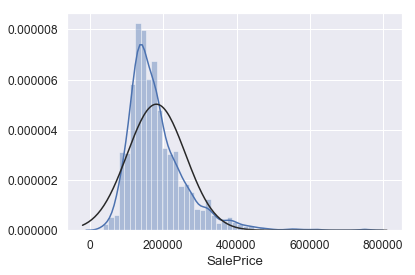

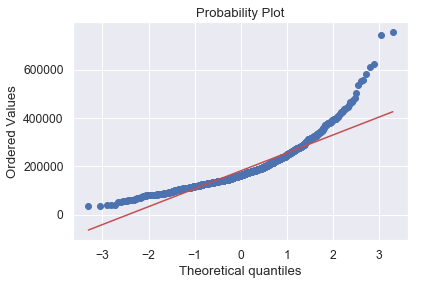

In [43]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


In [44]:
#train['SalePrice'] = np.log(train['SalePrice'])
#sns.distplot(train['SalePrice'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(train['SalePrice'], plot=plt)

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 0.216944
Kurtosis: 0.096293


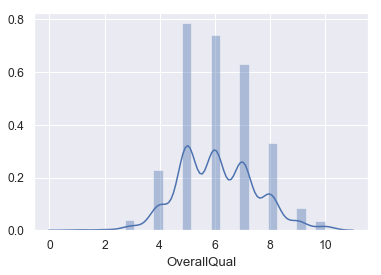

In [45]:
sns.distplot(train['OverallQual']);
print("Skewness: %f" % train['OverallQual'].skew())
print("Kurtosis: %f" % train['OverallQual'].kurt())
#print("Standard Deviation %f" % np.std(train['OverallQual']))


/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.366560
Kurtosis: 4.895121


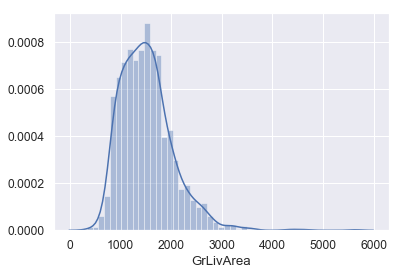

In [46]:
sns.distplot(train['GrLivArea']);
print("Skewness: %f" % train['GrLivArea'].skew())
print("Kurtosis: %f" % train['GrLivArea'].kurt())


/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: -0.613461
Kurtosis: -0.439552


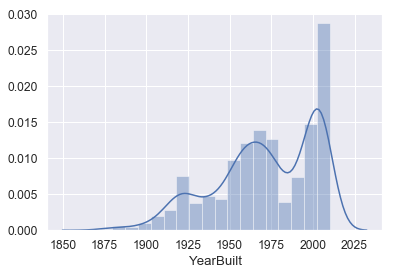

In [47]:
sns.distplot(train['YearBuilt']);
print("Skewness: %f" % train['YearBuilt'].skew())
print("Kurtosis: %f" % train['YearBuilt'].kurt())

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 0.179981
Kurtosis: 0.917067


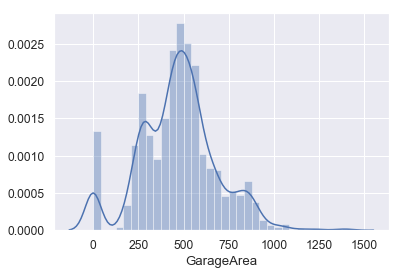

In [48]:
sns.distplot(train['GarageArea']);
print("Skewness: %f" % train['GarageArea'].skew())
print("Kurtosis: %f" % train['GarageArea'].kurt())

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: -1.422808
Kurtosis: 1.732124


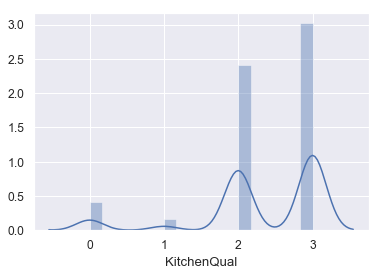

In [49]:
sns.distplot(train['KitchenQual']);
print("Skewness: %f" % train['KitchenQual'].skew())
print("Kurtosis: %f" % train['KitchenQual'].kurt())

### Cleaning outlier 

In [50]:
#null_columns=train.columns[train.isnull().any()]
#train[null_columns].isnull().sum()

In [51]:
#labels = []
#values = []
#for col in null_columns:
#    labels.append(col)
#    values.append(houses[col].isnull().sum())
#ind = np.arange(len(labels))
#width = 0.9
#fig, ax = plt.subplots(figsize=(12,50))
#rects = ax.barh(ind, np.array(values), color='violet')
#ax.set_yticks(ind+((width)/2.))
#ax.set_yticklabels(labels, rotation='horizontal')
#ax.set_xlabel("Count of missing values")
#ax.set_ylabel("Column Names")
#ax.set_title("Variables with missing values");

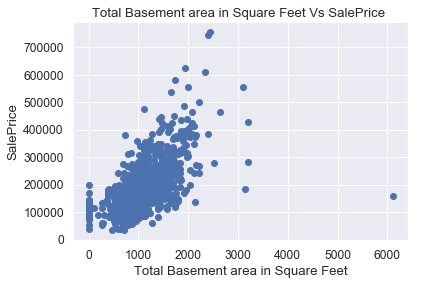

In [52]:
plt.scatter(train["TotalBsmtSF"],train["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/william/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


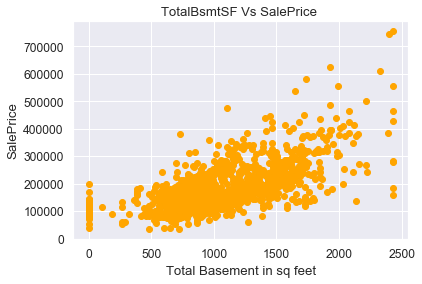

In [53]:
#there are few outliers in total basement area lets remove them
upperlimit = np.percentile(train.TotalBsmtSF.values, 99.5)
train['TotalBsmtSF'].ix[train['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(train.TotalBsmtSF, train["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/william/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


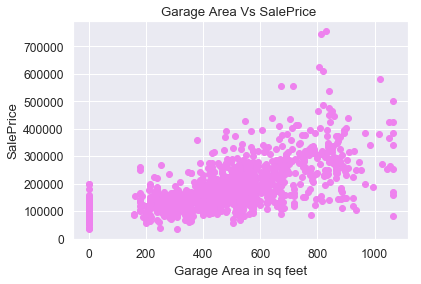

In [54]:
upperlimit = np.percentile(train.GarageArea.values, 99.5)
train['GarageArea'].ix[train['GarageArea']>upperlimit] = upperlimit

plt.scatter(train.GarageArea, train["SalePrice"].values,color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");

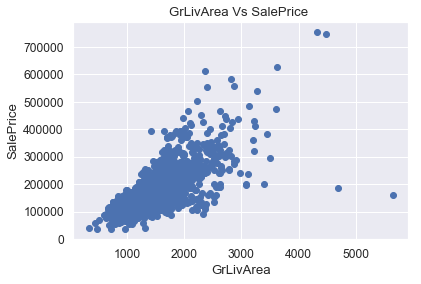

In [55]:
plt.scatter(train["GrLivArea"],train["SalePrice"])
plt.title("GrLivArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea");

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/william/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


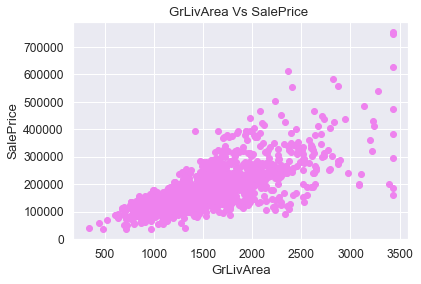

In [56]:
upperlimit = np.percentile(train.GrLivArea.values, 99.5)
train['GrLivArea'].ix[train['GrLivArea']>upperlimit] = upperlimit

plt.scatter(train.GrLivArea, train["SalePrice"].values,color='violet')
plt.title("GrLivArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea");


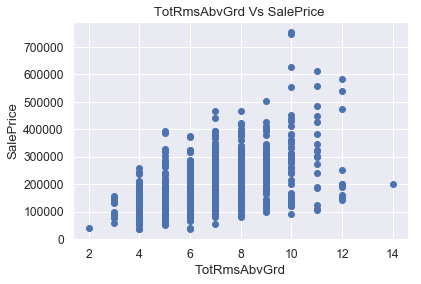

In [57]:
plt.scatter(train["TotRmsAbvGrd"],train["SalePrice"])
plt.title("TotRmsAbvGrd Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotRmsAbvGrd");

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/william/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


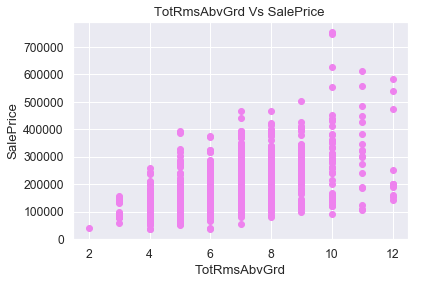

In [58]:
upperlimit = np.percentile(train.TotRmsAbvGrd.values, 99.5)
train['TotRmsAbvGrd'].ix[train['TotRmsAbvGrd']>upperlimit] = upperlimit

plt.scatter(train.TotRmsAbvGrd, train["SalePrice"].values,color='violet')
plt.title("TotRmsAbvGrd Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotRmsAbvGrd");


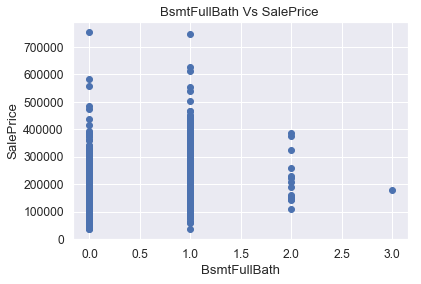

In [59]:
plt.scatter(train["BsmtFullBath"],train["SalePrice"])
plt.title("BsmtFullBath Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("BsmtFullBath");

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/william/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


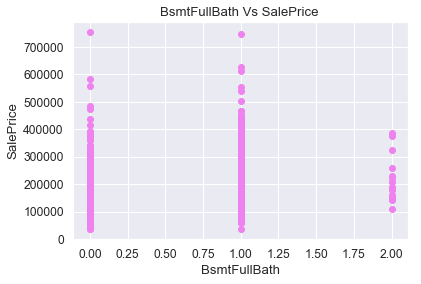

In [60]:
upperlimit = np.percentile(train.BsmtFullBath.values, 99.5)
train['BsmtFullBath'].ix[train['BsmtFullBath']>upperlimit] = upperlimit

plt.scatter(train.BsmtFullBath, train["SalePrice"].values,color='violet')
plt.title("BsmtFullBath Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("BsmtFullBath");


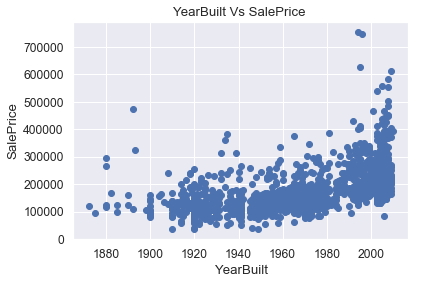

In [61]:
plt.scatter(train["YearBuilt"],train["SalePrice"])
plt.title("YearBuilt Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("YearBuilt");

/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/william/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


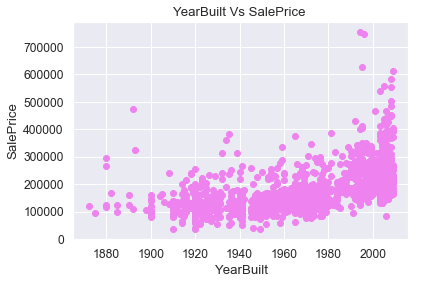

In [62]:
upperlimit = np.percentile(train.YearBuilt.values, 99.5)
train['YearBuilt'].ix[train['YearBuilt']>upperlimit] = upperlimit

plt.scatter(train.YearBuilt, train["SalePrice"].values,color='violet')
plt.title("YearBuilt Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("YearBuilt");



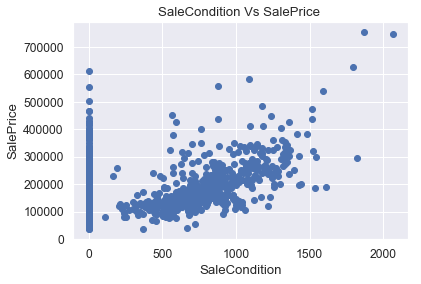

In [63]:
plt.scatter(train["2ndFlrSF"],train["SalePrice"])
plt.title("SaleCondition Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("SaleCondition");

In [64]:
#upperlimit = np.percentile(train.2ndFlrSF.values, 99.5)
#train['2ndFlrSF'].ix[train['2ndFlrSF']>upperlimit] = upperlimit

#plt.scatter(train.2ndFlrSF, train["SalePrice"].values,color='violet')
#plt.title("2ndFlrSF Vs SalePrice ")
#plt.ylabel("SalePrice")
#plt.xlabel("2ndFlrSF");


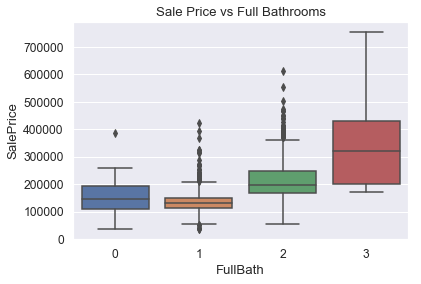

In [65]:
sns.boxplot(train["FullBath"],train["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


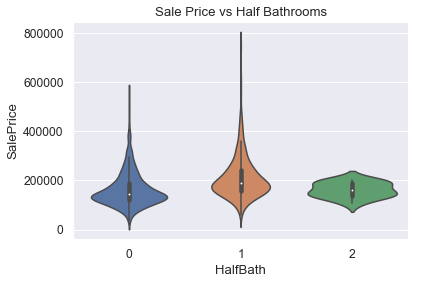

In [66]:
sns.violinplot( train["HalfBath"],train["SalePrice"])
plt.title("Sale Price vs Half Bathrooms");

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


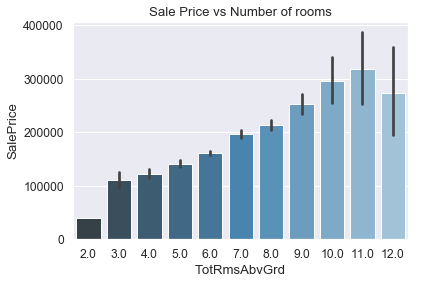

In [67]:
sns.barplot(train["TotRmsAbvGrd"],train["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

/Users/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


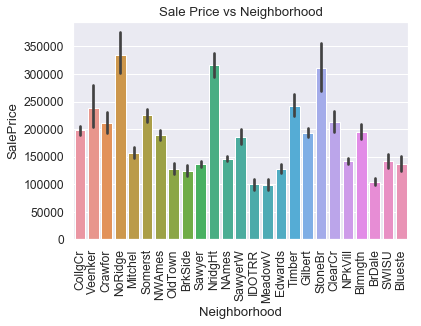

In [68]:
plt.xticks(rotation=90) 
sns.barplot(train["Neighborhood"],train["SalePrice"])
plt.title("Sale Price vs Neighborhood");

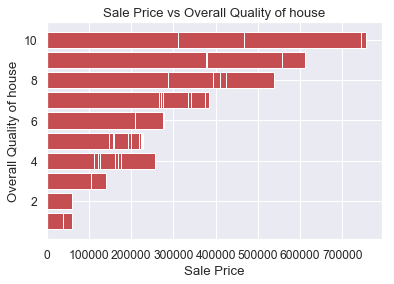

In [69]:
plt.barh(train["OverallQual"],width=train["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

In [70]:
final_train = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      train_test.loc[:,'MSSubClass':'SaleCondition']))
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,3,0,0,0,2,2008,WD,4,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,3,0,0,0,5,2007,WD,4,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,3,0,0,0,9,2008,WD,4,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,3,0,0,0,2,2006,WD,0,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,3,0,0,0,12,2008,WD,4,250000


In [71]:

final_train.shape
#all_data.head()

(2919, 79)

### test by zoning

In [72]:
#matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
#prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
#prices.hist();


In [73]:

train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = final_train.dtypes[final_train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

final_train[skewed_feats] = np.log1p(final_train[skewed_feats])


/Users/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log1p
  # This is added back by InteractiveShellApp.init_path()


In [74]:
final_train = pd.get_dummies(final_train)
final_train = final_train.fillna(final_train.mean())
final_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,65.000000,9.042040,7,5,2003.0,2003,5.283204,6.561031,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,3.044522,80.000000,9.169623,6,8,1976.0,1976,0.000000,6.886532,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,4.110874,68.000000,9.328212,7,5,2001.0,2002,5.093750,6.188264,0.000000,...,0,0,1,0,0,0,0,0,0,0
3,4.262680,60.000000,9.164401,7,5,1915.0,1970,0.000000,5.379897,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,4.110874,84.000000,9.565284,8,5,2000.0,2000,5.860786,6.486161,0.000000,...,0,0,1,0,0,0,0,0,0,0
5,3.931826,85.000000,9.555064,5,5,1993.0,1995,0.000000,6.597146,0.000000,...,0,0,1,0,0,0,0,0,0,0
6,3.044522,75.000000,9.218804,8,5,2004.0,2005,5.231109,7.222566,0.000000,...,0,0,1,0,0,0,0,0,0,0
7,4.110874,0.000000,9.247925,7,6,1973.0,1973,5.484797,6.756932,3.496508,...,0,0,1,0,0,0,0,0,0,0
8,3.931826,51.000000,8.719481,7,5,1931.0,1950,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
9,5.252273,50.000000,8.912069,5,6,1939.0,1950,0.000000,6.747587,0.000000,...,0,0,1,0,0,0,0,0,0,0


In [75]:
X_train = final_train[:train.shape[0]]
X_test = final_train[train.shape[0]:]
y = train.SalePrice
train.shape

(1460, 81)

### Models 
Lasso and Ridge regulation test, return the cross validation rmse error to evaluate the quality of the models. Depending on the score, there will be a computational / tuning in the features 

In [76]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm

def rmse_cv(train_test):
    rmse= np.sqrt(-cross_val_score(train_test, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


In [77]:
model_ridge = Ridge()


In [78]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

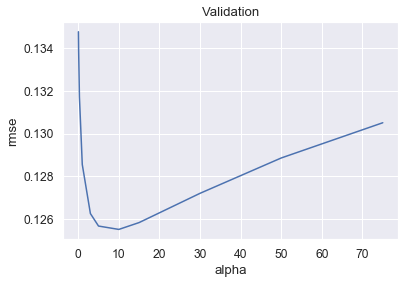

In [79]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [80]:
cv_ridge.min()

0.1255124403411541

In [81]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)


In [82]:
rmse_cv(model_lasso).mean()

0.12056425822835434

In [83]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [84]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 109 variables and eliminated the other 247 variables


In [85]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

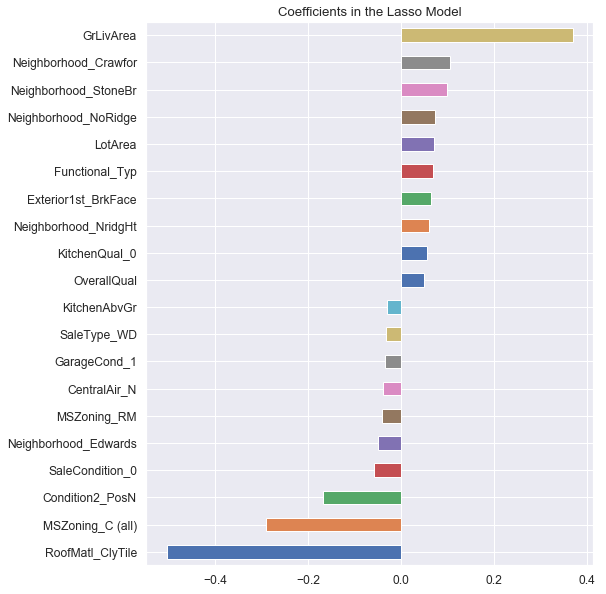

In [86]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

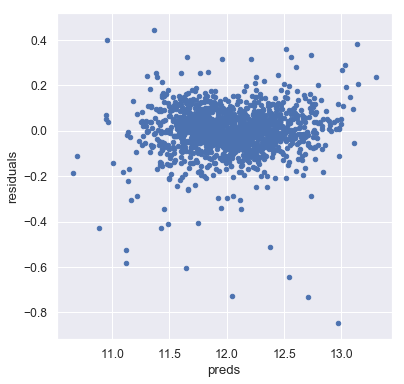

In [87]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")


In [88]:
solution = pd.DataFrame({"Id":train_test.Id, "SalePrice":preds})
solution.to_csv("lasso_sol.csv", index = False)

ValueError: Shape of passed values is (2, 3), indices imply (2, 1459)

In [ ]:
final_train_rf_1 = RandomForestRegressor() 

In [ ]:
linreg_1 = LinearRegression()
linreg_1.fit(X_train, y)

In [ ]:
final_train_rf_1.fit(X_train, y) 

In [ ]:
final_train_rf_1.base_estimator

In [ ]:
final_train_rf_1.estimators_

In [ ]:
final_train_rf_1.predict(X_train)

In [ ]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split

scores = cross_val_score(linreg_1, X_train, y, cv = 5)
scores

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = .25)
clf = linreg_1.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
#solution = pd.DataFrame({"Id":train_test.Id, "SalePrice":y})
#solution.to_csv("lasso_sol.csv", index = False)

In [ ]:
#import seaborn as sns; sns.set(color_codes=True)
#ramdonforest = sns.regplot(X_train="Tree", y_train ="", data=final_train_rf_1)



In [ ]:
import xgboost as xgb

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [ ]:
print(model)

In [ ]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, y)


In [ ]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))


In [ ]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [ ]:
preds = 0.7*lasso_preds + 0.3*xgb_preds


In [ ]:
solution = pd.DataFrame({"Id":train_test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

In [ ]:
X_train = StandardScaler().fit_transform(X_train)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)


In [ ]:
X_tr.shape

In [ ]:
X_tr

In [ ]:
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")

In [ ]:
model.summary()

In [ ]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))

In [ ]:
pd.Series(model.predict(X_val)[:,0]).hist()

In [ ]:
corr=train.corr()["SalePrice"]
x = corr[np.argsort(corr, axis=0)[::-1]]
y =x.abs()
z =y.sort_values()
z.head()